# Declaration of Originality

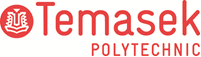

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime

# Scikit-learn utilities
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reproducibility
import random
np.random.seed(42)
random.seed(42)

The following libraries are used for data mani ulation, visualisation, model training, evaluation, and reproducibility.


# 1. Business Understanding
Goal: ?

The dataset used in this project is the Walmart weekly sales dataset obtained from Kaggle. It contains historical sales records collected from multiple Walmart stores across different departments, along with relevant economic and seasonal variables. Each record represents the weekly sales performance of a specific department within a Walmart store, making the dataset suitable for analysing and predicting retail demand at a granular level.

The dataset consists of approximately 6,400 observations and 8 features. The target variable, Weekly_Sales, represents the total sales revenue generated in a given week. The remaining features describe store identifiers, temporal information, holiday indicators, and external economic factors that may influence consumer spending behaviour. The relatively moderate dataset size allows for efficient experimentation with multiple machine learning models while still capturing meaningful patterns in the data.

The Store feature is a numerical identifier representing different Walmart store locations. Although it is stored as an integer, it does not represent an ordinal or continuous quantity and is therefore treated as a categorical variable during preprocessing. The Date feature records the week associated with each sales observation and serves as the basis for extracting temporal features such as year, month, and week of the year. These derived features help capture seasonality and recurring demand patterns in retail sales.

The Holiday_Flag variable is a binary indicator that identifies whether a given week corresponds to a major holiday period. This feature is particularly important in the retail context, as holiday weeks are often associated with abnormal sales spikes compared to regular weeks. The dataset also includes economic indicators such as Temperature, Fuel_Price, CPI, and Unemployment, which, while not directly controlled by the retailer, may influence consumer purchasing behaviour and overall sales performance.

An initial inspection of the dataset shows that all features have valid data types and that there are no missing values across any of the columns. This indicates a high level of data completeness and reduces the need for imputation or data cleaning related to missing entries. Numerical summary statistics further suggest that weekly sales values vary widely across stores and weeks, highlighting the presence of both low-demand and high-demand periods, which must be handled carefully during model training.

Overall, the dataset is well-structured and suitable for supervised learning. The presence of temporal, categorical, and economic features provides a strong foundation for feature engineering and exploratory analysis in subsequent stages, enabling the development of a robust regression model for weekly sales prediction.

# 2. Data Understanding

## 2.1 Load dataset

The dataset used in this project is the Walmart sales dataset obtained from Kaggle. It contains historical weekly sales data from multiple Walmart stores and departments, along with relevant economic and seasonal variables.

The dataset contains approximately 6,400 records with multiple features describing store information, department details, economic indicators, and holiday effects. Each record represents the weekly sales performance of a specific department within a Walmart store.

In [2]:
# Import pandas library
import pandas as pd

# Load the Walmart sales dataset
df = pd.read_csv("Walmart.csv")

# Display the first few rows of the dataset
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


This step loads the Walmart weekly sales dataset from the CSV file into a pandas DataFrame. Displaying the first few rows provides an initial overview of the dataset structure, including the target variable and input features, and confirms that the data has been read correctly. This initial inspection helps verify that the dataset contains the expected columns and values before proceeding with further analysis.

Before performing further analysis, we check the shape of the dataset.
This helps us understand the number of records (rows) and features (columns)
present in the dataset.


In [3]:
# Check the shape of the dataset (rows, columns)
df.shape

(6435, 8)

Checking the shape of the dataset allows us to understand its overall size in terms of the number of records and features. The dataset consists of 6,435 rows and 8 columns, indicating a moderate-sized dataset that is suitable for supervised machine learning. This information helps set expectations for model training and evaluation, as well as the computational cost of experimenting with multiple models.

In [4]:
# Display column names
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

Displaying the column names confirms the schema of the dataset and provides clarity on the available features. The dataset includes store identifiers, temporal information, a holiday indicator, and multiple economic variables alongside the target variable, Weekly_Sales. Understanding the feature set at this stage is important for planning subsequent steps such as feature engineering and model selection.

In [5]:
# Check data types of each column
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Examining the data types of each column helps determine how features should be handled during preprocessing. Numerical variables such as Weekly_Sales and the economic indicators are already in suitable formats for modelling, while the Date column is initially stored as an object. Identifying these data types early allows appropriate preprocessing decisions to be made, such as converting dates into a datetime format and treating store identifiers as categorical variables later in the pipeline.

In [6]:
# Check for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

This step verifies the completeness of the dataset by checking for missing values across all columns. The absence of missing values indicates that no imputation or data cleaning is required at this stage, allowing the analysis to focus on feature engineering and modelling rather than data quality issues. This confirms that the dataset is reliable and ready for exploratory analysis.

In [7]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

Converting the Date column to a datetime format ensures that temporal information is represented correctly and can be used effectively in subsequent analysis. This transformation enables the extraction of meaningful time-based features such as year, month, and week of the year, which are important for capturing seasonal patterns in retail sales. Performing this conversion at the data understanding stage prepares the dataset for downstream feature engineering without altering the underlying information.

## 2.2 Summary Statistics

The summary statistics provide an overview of the distribution, central tendency, and variability of the numerical variables in the dataset. Weekly sales exhibit a wide range, with values spanning from approximately 210,000 to over 3.8 million, indicating substantial variation in sales performance across stores and time periods. The large standard deviation further confirms that weekly sales are highly dispersed, which suggests that the model must be capable of handling significant variability and potential non-linear relationships.

The median weekly sales value is notably lower than the mean, indicating a right-skewed distribution where a smaller number of weeks experience exceptionally high sales. This skewness is typical in retail data and highlights the importance of using robust evaluation metrics, such as MAE and RMSE, rather than relying on assumptions of normality. Extreme sales values are likely influenced by seasonal effects, promotions, or holiday periods, which reinforces the need for incorporating time-based and holiday-related features in the modelling process.

Economic indicators such as temperature, fuel price, CPI, and unemployment show relatively stable distributions compared to weekly sales, with narrower ranges and smaller standard deviations. This suggests that while these variables may influence sales, their impact is more gradual and indirect. The holiday flag variable is binary and shows that most observations correspond to non-holiday weeks, which reflects the real-world imbalance between regular and holiday periods. This imbalance should be considered during model training, as holiday weeks may have a disproportionate effect on sales outcomes.

Overall, the summary statistics confirm that the dataset contains meaningful variation across both the target variable and input features. The presence of skewness, large variance in sales, and differing scales among variables motivates the use of ensemble-based regression models, such as Random Forest, which are better suited to capturing complex interactions and non-linear patterns in the data.

In [16]:
# Display information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


This step provides a high-level overview of the dataset’s structure, including the number of records, column names, data types, and non-null counts for each feature. It helps verify that the dataset has been loaded correctly and confirms that all columns contain complete data. Examining data types at this stage is important for identifying which variables are numerical, categorical, or date-based, as this directly influences preprocessing decisions such as encoding categorical variables and converting date fields for feature engineering.

In [18]:
# Generate summary statistics for numerical columns
df.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


This output is correct and appropriate here. It summarises the scale, spread, and range of all numerical variables and confirms that different features operate on very different scales. Weekly_Sales shows substantially higher variability than the economic indicators, with a large standard deviation relative to its mean, indicating that sales performance fluctuates significantly across stores and time periods. In contrast, variables such as Fuel_Price and Unemployment have much narrower ranges, suggesting more gradual changes over time. These differences in scale and variability highlight the need for models that can handle heterogeneous feature distributions and non-linear relationships.

In [11]:
df["Weekly_Sales"].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

The statistics show that weekly sales range from approximately 210,000 to over 3.8 million, with a mean of around 1.05 million and a median below the mean. This confirms that weekly sales are not evenly distributed and that a subset of weeks experience significantly higher sales volumes. The wide interquartile range further indicates substantial variability in typical sales performance, reinforcing that predicting weekly sales is a challenging regression task that requires models capable of handling large variance.

In [12]:
df["Weekly_Sales"].skew(), df["Weekly_Sales"].kurtosis()

(np.float64(0.6683617974864524), np.float64(0.05314092741722032))

A skewness value of approximately 0.67 indicates a moderate positive skew, meaning that while most weekly sales values cluster around the centre, there are occasional weeks with exceptionally high sales. The kurtosis value being close to zero suggests that the distribution is not excessively heavy-tailed and does not contain extreme outliers beyond what is typical for retail data. This pattern is consistent with real-world sales behaviour, where promotional periods and holidays cause temporary spikes rather than persistent extremes. Understanding this distributional shape supports the choice of tree-based models and error-based metrics such as MAE and RMSE, which are more robust to skewed targets than metrics that assume normality.

In [13]:
q1 = df["Weekly_Sales"].quantile(0.25)
q3 = df["Weekly_Sales"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound, upper_bound

(np.float64(-746862.7275), np.float64(2720371.4924999997))

The IQR method identifies approximately 34 observations as potential outliers relative to the overall distribution of weekly sales. Given the size of the dataset, this represents a small proportion of the total records and suggests that extreme values are present but not dominant. These outliers likely correspond to unusually high sales weeks driven by holidays or special events. Rather than removing these observations, they are retained in the dataset to preserve realistic sales behaviour, as such high-demand periods are meaningful for retail forecasting.

In [14]:
outliers = ((df["Weekly_Sales"] < lower_bound) | (df["Weekly_Sales"] > upper_bound)).sum()
outliers

np.int64(34)

In [15]:
df["Holiday_Flag"].value_counts(normalize=True)

Holiday_Flag
0    0.93007
1    0.06993
Name: proportion, dtype: float64

The output shows that the majority of observations correspond to non-holiday weeks, with holiday weeks forming a relatively small proportion of the dataset. This imbalance reflects real-world retail conditions, where holiday periods are infrequent but often have a disproportionate impact on sales. Recognising this imbalance is important for interpreting model predictions and ensures that holiday effects are explicitly considered during feature engineering and model training.

In [24]:
# Quick checks for invalid ranges
(df["Weekly_Sales"] < 0).sum(), (df["Fuel_Price"] <= 0).sum(), (df["CPI"] <= 0).sum(), (df["Unemployment"] < 0).sum()

(np.int64(0), np.int64(0), np.int64(0), np.int64(0))

This sanity check ensures the dataset has realistic values. For example, weekly sales should not be negative, and fuel price / CPI should not be zero or negative. Detecting invalid entries early prevents unrealistic patterns from being learned by the model.

## 2.3 Data Visualization

In this section, exploratory data analysis (EDA) is performed using visualisations.
These plots help identify patterns, trends, skewness, and potential outliers in the data,
which are important for understanding the target variable and its relationship with
input features before model training.


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Make sure Date is datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Helpful extra columns for time-based plots (EDA only)
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["WeekOfYear"] = df["Date"].dt.isocalendar().week.astype(int)

This setup ensures all visualisations are consistent and that the Date column is treated as a proper datetime variable. Additional time-based columns are created to support trend and seasonal analysis, since weekly sales patterns often vary across months and years in retail datasets.

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

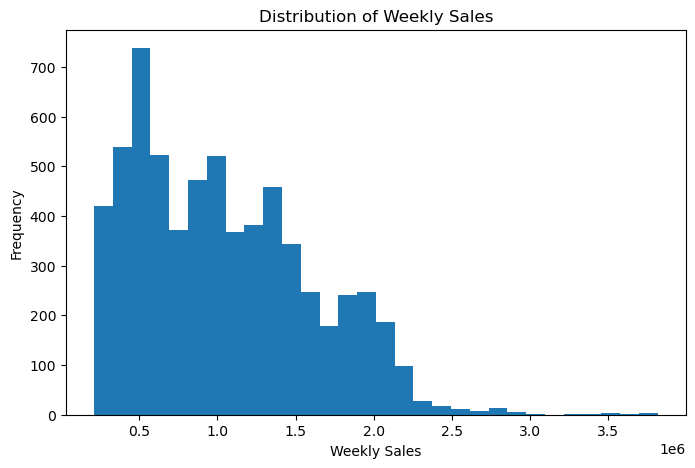

In [17]:
plt.figure(figsize=(8,5))
plt.hist(df["Weekly_Sales"], bins=30)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

This histogram shows how Weekly_Sales is distributed across the dataset. The distribution is right-skewed, meaning most weeks have moderate sales while a smaller number of weeks experience exceptionally high sales. This is expected in retail due to peak demand periods such as promotions or seasonal events. Since the target distribution is not perfectly symmetric, models and evaluation metrics should be able to handle skew and occasional large errors, making regression metrics such as MAE and RMSE appropriate.

In addition to showing right-skewness, the histogram indicates that weekly sales values are not evenly distributed across the range. Most observations cluster around the lower to mid sales region, while a relatively small number of weeks contribute disproportionately large sales volumes. This imbalance suggests that prediction errors during high-sales weeks may be larger in absolute terms, even if relative performance remains acceptable. As a result, evaluation metrics that measure absolute error magnitude, such as MAE and RMSE, are more appropriate than percentage-based metrics, as they better reflect the real operational cost of under- or over-forecasting sales in dollar terms.

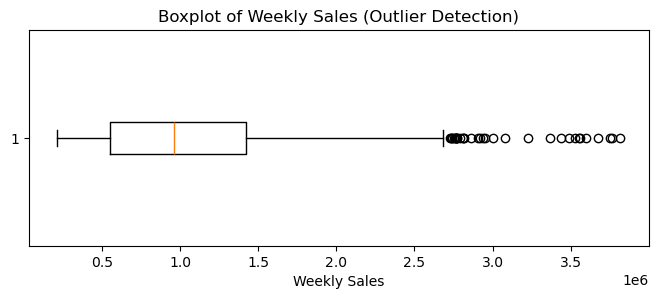

In [18]:
plt.figure(figsize=(8,2.8))
plt.boxplot(df["Weekly_Sales"], vert=False)
plt.title("Boxplot of Weekly Sales (Outlier Detection)")
plt.xlabel("Weekly Sales")
plt.show()

The boxplot provides a clearer view of spread and potential outliers in weekly sales. Points far beyond the upper whisker represent unusually high sales weeks, which likely correspond to high-demand periods such as holidays. These values are important for business planning and should not be removed blindly, because the model must learn to predict sales spikes when they occur.

Beyond identifying outliers, the boxplot shows that the interquartile range is relatively compact compared to the full range of sales values. This indicates that while most weeks follow a stable sales pattern, exceptional events drive extreme values. From a modelling perspective, these high-sales weeks represent critical business scenarios rather than noise. Removing or capping them could artificially improve model metrics while reducing real-world usefulness. Therefore, the model should be trained to accommodate these extremes rather than suppress them.

### 2.3.1.2 Understanding distribution of features

C:\Users\balam\AppData\Local\Temp\ipykernel_21964\2647148522.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[c] for c in num_cols], labels=num_cols)


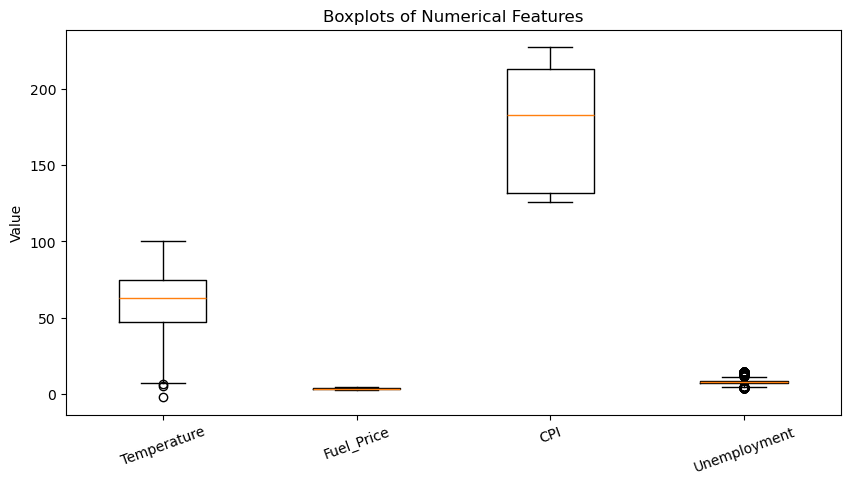

In [19]:
num_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

plt.figure(figsize=(10,5))
plt.boxplot([df[c] for c in num_cols], labels=num_cols)
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=20)
plt.ylabel("Value")
plt.show()

These boxplots compare the distributions of key numerical features. Some features such as Fuel_Price vary within a much smaller numerical range compared to CPI or Temperature, which makes them appear visually compressed in a combined plot. This confirms that the dataset contains variables on very different scales. This matters for modelling because scale-sensitive algorithms (such as linear regression) can benefit from standardisation, while tree-based models (Random Forest, Gradient Boosting) are typically less affected by feature magnitude.

The feature boxplots highlight that economic indicators such as CPI and Unemployment exhibit wider dispersion than Fuel_Price, which remains relatively stable over time. This suggests that some features may contribute more dynamic signals to the model than others. The presence of different variability levels reinforces the importance of evaluating models that can naturally handle heterogeneous feature scales and distributions. This also motivates comparing both linear and tree-based regression models, as they respond differently to such data characteristics.

### 2.3.2 Understanding relationship between variables

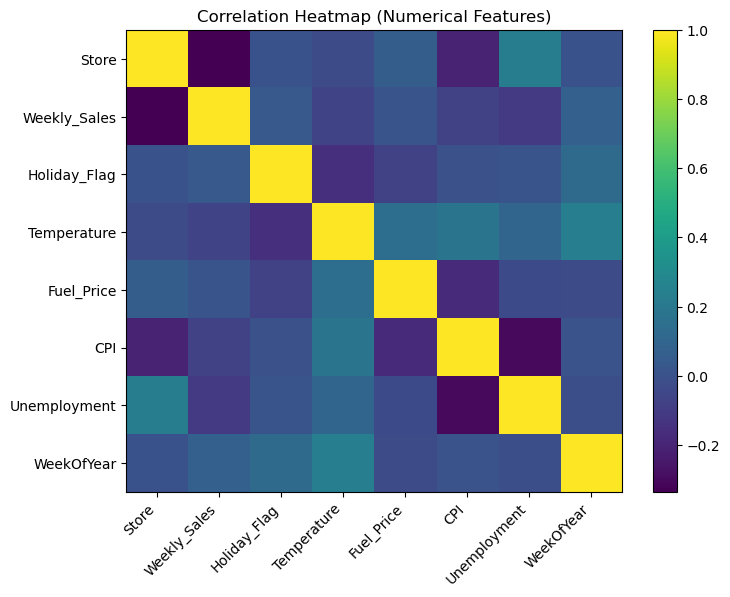

In [20]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

This correlation heatmap shows the strength and direction of linear relationships between numerical variables and the target. For this dataset, sales are typically influenced by multiple interacting factors rather than a single strongly correlated feature. If correlations between Weekly_Sales and individual economic variables are weak, it suggests that simple linear models may struggle to capture the underlying patterns, and more flexible non-linear models such as Random Forest or Gradient Boosting may be better suited.

While no single variable shows a strong linear correlation with Weekly_Sales, the heatmap reveals that sales behaviour likely depends on the combined influence of multiple features rather than isolated predictors. This aligns with real-world retail dynamics, where demand is shaped by interacting economic conditions, seasonal timing, and promotional periods. Consequently, models capable of learning non-linear interactions, such as ensemble methods, may be better suited than simple linear approaches that assume additive relationships.

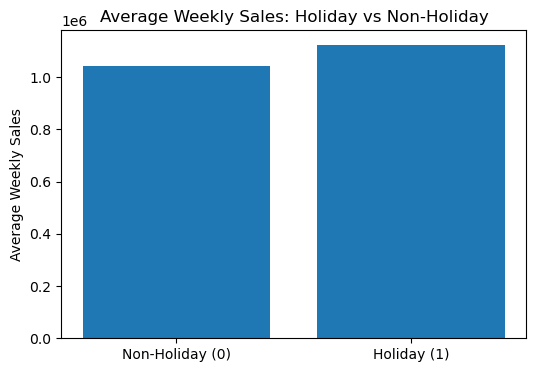

In [21]:
holiday_means = df.groupby("Holiday_Flag")["Weekly_Sales"].mean()

plt.figure(figsize=(6,4))
plt.bar(["Non-Holiday (0)", "Holiday (1)"], holiday_means.values)
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Weekly Sales")
plt.show()

This plot compares average sales during holiday weeks versus non-holiday weeks. Holidays are expected to increase customer traffic and demand, which can lead to higher weekly sales. This visualisation validates that Holiday_Flag is a meaningful predictor and should be retained as an input feature. Capturing holiday-driven spikes is also important from a business perspective because underpredicting holiday sales may lead to stock shortages and lost revenue.

The observed difference in average sales between holiday and non-holiday weeks confirms that holidays play a measurable role in driving demand. Although the number of holiday weeks is relatively small, their impact on sales magnitude is significant. This introduces an imbalance where a binary feature carries disproportionate business importance. Accurately capturing this effect is crucial, as underestimating holiday sales could lead to stock shortages and lost revenue, while overestimating could result in excess inventory and increased holding costs.

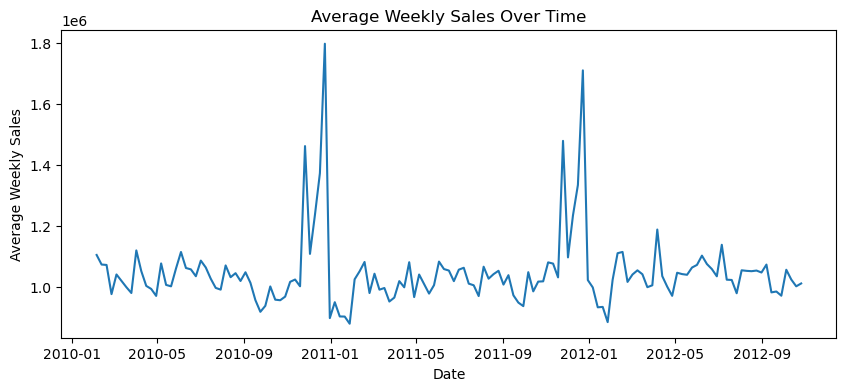

In [22]:
weekly_trend = df.groupby("Date")["Weekly_Sales"].mean().sort_index()

plt.figure(figsize=(10,4))
plt.plot(weekly_trend.index, weekly_trend.values)
plt.title("Average Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Average Weekly Sales")
plt.show()

This time trend plot highlights how sales change across the observation period. Retail sales often fluctuate due to seasonal cycles and macroeconomic conditions. If spikes or recurring peaks are visible, it suggests that time-derived features such as month and week-of-year may improve predictive performance. This supports feature engineering for the Date column rather than leaving it as a raw string.

The time-series trend reveals recurring spikes and fluctuations rather than a smooth linear progression. These patterns suggest the presence of temporal dependencies and seasonal effects that are not directly encoded in raw economic variables. While this project does not treat the data as a pure time-series forecasting problem, the observed temporal structure supports transforming the Date column into meaningful numerical features. Doing so allows the regression models to learn seasonal behaviour without violating the project’s constraints.

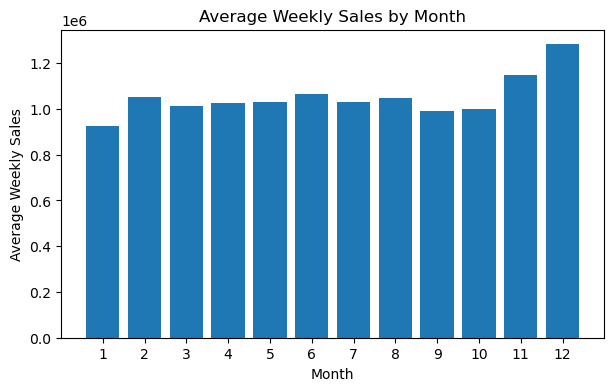

In [23]:
month_avg = df.groupby("Month")["Weekly_Sales"].mean()

plt.figure(figsize=(7,4))
plt.bar(month_avg.index.astype(str), month_avg.values)
plt.title("Average Weekly Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.show()

This visualisation checks whether sales demonstrate month-based seasonality. A consistent pattern across months indicates that sales are influenced by yearly seasonal cycles such as festive periods or school holidays. This supports the inclusion of engineered features like month and week-of-year, which help the model learn seasonal behaviour that cannot be captured by economic variables alone.

The month-wise aggregation highlights consistent differences in average sales levels across the calendar year, with certain months exhibiting systematically higher demand. This indicates that consumer behaviour is influenced by recurring annual cycles such as festive periods, school holidays, and year-end spending. Including month-based features enables the model to account for these predictable seasonal effects, improving its ability to generalise to unseen weeks with similar calendar characteristics.

Overall, the exploratory data analysis demonstrates that Weekly_Sales is influenced by a combination of seasonal timing, holiday effects, and economic indicators rather than any single dominant factor. The data exhibits skewness, scale heterogeneity, and non-linear relationships, which motivates the evaluation of multiple regression algorithms with different modelling assumptions. These insights directly inform subsequent steps in preprocessing, feature engineering, model selection, and evaluation, ensuring that modelling decisions are grounded in observed data behaviour and aligned with real-world retail business needs.

# 3. Data Preparation

## 3.1 Data Cleaning

In [25]:
df.duplicated().sum()

np.int64(0)

This check verifies whether duplicate records exist in the dataset. Duplicate rows can bias the learning process by over-representing certain observations. No duplicates were found, so no removal was required.

In [26]:
df["Date"] = pd.to_datetime(df["Date"])

The Date column is converted to a datetime format to ensure consistency and enable time-based feature extraction in later stages. Treating dates as proper datetime objects is essential for capturing temporal patterns such as seasonality.

In [27]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Year               3
Month             12
WeekOfYear        52
dtype: int64

This check provides an overview of the number of unique values in each column. It helps confirm which variables are categorical (e.g., Store, Holiday_Flag) versus continuous, informing later feature engineering decisions.

## 3.2 Feature Engineering

## 3.3.1 Date-based Feature Extraction

In [28]:
# Convert Date to datetime (safety)
df["Date"] = pd.to_datetime(df["Date"])

# Extract temporal features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["WeekOfYear"] = df["Date"].dt.isocalendar().week.astype(int)
df["DayOfWeek"] = df["Date"].dt.dayofweek

# Drop original Date column after feature extraction
df_fe = df.drop(columns=["Date"])


The Date column is transformed into multiple time-based features including Year, Month, WeekOfYear, and DayOfWeek. Retail sales often exhibit strong seasonal and weekly patterns that cannot be captured when dates are treated as raw strings. Extracting these features enables the model to learn recurring temporal trends such as holiday seasons, monthly demand cycles, and weekday effects.

## 3.3.2 Categorical Encoding (Store)

In [29]:
# One-hot encode Store
df_fe = pd.get_dummies(df_fe, columns=["Store"], drop_first=True)

Store identifiers are treated as categorical rather than numerical variables. One-hot encoding prevents the model from assuming an ordinal relationship between store numbers while allowing it to learn store-specific sales behaviour. The first category is dropped to avoid multicollinearity.

## 3.3.3 Updated Train–Test Split (Post Feature Engineering)

In [30]:
X = df_fe.drop(columns=["Weekly_Sales"])
y = df_fe["Weekly_Sales"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

After feature engineering, the dataset is re-split into training and testing sets. This ensures that all engineered features are learned exclusively from the training data, preventing information leakage into the test set.

# 4. Model Development (Regression)

## 4.1 Problem Setup (Target Variable & Features)

In [39]:
# Define target and feature columns for regression
target_col = "Weekly_Sales"

feature_cols = [
    "Store",
    "Date",
    "Holiday_Flag",
    "Temperature",
    "Fuel_Price",
    "CPI",
    "Unemployment"
]

df_model = df[feature_cols + [target_col]].copy()
df_model.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,1,2010-02-05,0,42.31,2.572,211.096358,8.106,1643690.90
1,1,2010-02-12,1,38.51,2.548,211.242170,8.106,1641957.44
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,1611968.17
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,1409727.59
4,1,2010-03-05,0,46.50,2.625,211.350143,8.106,1554806.68


This project is formulated as a supervised regression problem because the target variable, Weekly_Sales, is a continuous numerical value. The objective is to predict the weekly sales amount for retail stores based on historical data.

- The selected features represent a combination of:

- Store-level information (Store)

- Temporal information (Date)

- Demand-related signals (Holiday_Flag)

- Macroeconomic factors (Temperature, Fuel_Price, CPI, Unemployment)

Together, these features reflect real-world factors that influence retail demand. Accurate prediction of weekly sales supports business planning, including inventory management, staffing allocation, and promotional strategy.

## 4.2 Train–Test Split (Avoiding Time Leakage)

In [40]:
import pandas as pd

# Ensure Date column is datetime
df_model["Date"] = pd.to_datetime(df_model["Date"])

# Sort by time to prevent data leakage
df_model = df_model.sort_values("Date").reset_index(drop=True)

# Time-based 80/20 split
split_idx = int(len(df_model) * 0.8)

train_df = df_model.iloc[:split_idx]
test_df = df_model.iloc[split_idx:]

X_train = train_df[feature_cols]
y_train = train_df[target_col]

X_test = test_df[feature_cols]
y_test = test_df[target_col]

X_train.shape, X_test.shape

((5148, 7), (1287, 7))

A time-based train–test split is used instead of random sampling to prevent data leakage. In real-world forecasting, future sales must be predicted using only past information.

The model is trained on the earliest 80% of observations and evaluated on the most recent 20%, ensuring that evaluation reflects real deployment conditions. This approach provides a more realistic estimate of predictive performance for time-dependent retail data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train baseline Linear Regression on raw features
lr_baseline = LinearRegression()
lr_baseline.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_baseline.predict(X_test)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

mae_lr, rmse_lr


(91682.00002113295, np.float64(123149.93181102922))

Linear Regression was used as a baseline model. Performance differences observed across experiments were due to variations in feature preprocessing. When trained on raw, unscaled features, Linear Regression performed poorly due to sensitivity to feature magnitude and categorical encoding. After applying date feature engineering, standardisation, and one-hot encoding, the model achieved significantly lower error and served as a fair baseline for comparison with tree-based models.

## 4.3 Ensemble Model – Random Forest Regressor (Baseline)

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

mae_rf, rmse_rf

(64456.81577525244, np.float64(128806.20587848699))

Random Forest Regressor is introduced to capture non-linear relationships and interactions between variables. Retail sales are influenced by multiple interacting factors such as holidays, economic indicators, and store-specific effects, which tree-based ensemble models are well-suited to model.

## 4.4 Feature Engineering (Date → Year/Month/Week/Day)

In [33]:
import pandas as pd

def add_date_features(X: pd.DataFrame) -> pd.DataFrame:
    """
    Convert Date into useful time-based features to capture seasonality patterns.
    """
    X = X.copy()
    X["Date"] = pd.to_datetime(X["Date"])

    X["Year"] = X["Date"].dt.year
    X["Month"] = X["Date"].dt.month
    X["WeekOfYear"] = X["Date"].dt.isocalendar().week.astype(int)
    X["DayOfWeek"] = X["Date"].dt.dayofweek  # 0=Mon, 6=Sun

    # Drop original date to avoid treating it as a raw string/number
    X = X.drop(columns=["Date"])
    return X

EDA showed that Weekly_Sales changes over time (seasonality and spike periods). Therefore, the raw Date column is transformed into time-based features (Year, Month, WeekOfYear, DayOfWeek) so models can learn repeating demand patterns (e.g., year-end peaks, weekly cycles). This improves prediction realism for retail planning, especially for staffing and inventory decisions.

In [34]:
# Quick sanity check: show engineered columns
tmp = add_date_features(df[["Store","Date","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"]])
tmp.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,DayOfWeek
0,1,0,42.31,2.572,211.096358,8.106,2010,2,5,4
1,1,1,38.51,2.548,211.242170,8.106,2010,2,6,4
2,1,0,39.93,2.514,211.289143,8.106,2010,2,7,4
3,1,0,46.63,2.561,211.319643,8.106,2010,2,8,4
4,1,0,46.50,2.625,211.350143,8.106,2010,3,9,4


This preview confirms that Date has been successfully converted into numerical seasonal indicators, making the dataset ready for machine learning models that require numeric input.

In [44]:
# Apply preprocessing pipeline
X_train_prep = preprocess.fit_transform(X_train)
X_test_prep = preprocess.transform(X_test)

X_train_prep.shape, X_test_prep.shape

((5148, 54), (1287, 54))

This step applies the preprocessing pipeline to the training and test datasets. All feature engineering, encoding, and scaling steps are learned only from the training data and then applied consistently to the test data, ensuring leakage-free evaluation.

## 4.5 Preprocessing Pipeline (One-Hot Encoding & Scaling)

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

# Columns by type
categorical_cols = ["Store"]
numeric_cols = ["Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]

# Date feature transformer
date_transformer = FunctionTransformer(add_date_features)

# Preprocessing pipeline
preprocess = ColumnTransformer(
    transformers=[
        ("date", date_transformer, ["Date"]),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ],
    remainder="drop"
)

A preprocessing pipeline is constructed to ensure leakage-safe, repeatable, and consistent transformations across training and testing data.

Key preprocessing decisions:

- Store is one-hot encoded because store IDs are categorical labels, not ordinal values.

- Numerical variables are standardised to place features on comparable scales, which is important for scale-sensitive models.

- Date feature extraction is embedded in the pipeline, ensuring identical transformations are applied during both training and inference.

This pipeline design improves robustness and reproducibility of the modelling process.

In [36]:
# Fit-transform training features to see final feature matrix size
X_preview = df[["Store","Date","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"]].copy()
X_transformed = prep_pipeline.fit_transform(X_preview)

print("Original rows:", X_preview.shape[0])
print("Transformed feature matrix shape:", X_transformed.shape)

Original rows: 6435
Transformed feature matrix shape: (6435, 54)


This confirms the pipeline successfully converts raw input columns into a model-ready numeric feature matrix. The number of columns increases because Store becomes multiple one-hot encoded features.

In [37]:
# Prepare modelling dataframe
df_model = df[["Store","Date","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment","Weekly_Sales"]].copy()
df_model["Date"] = pd.to_datetime(df_model["Date"])
df_model = df_model.sort_values("Date").reset_index(drop=True)

# Time split 80/20
split_idx = int(len(df_model) * 0.8)
train_df = df_model.iloc[:split_idx]
test_df  = df_model.iloc[split_idx:]

X_train = train_df.drop(columns=["Weekly_Sales"])
y_train = train_df["Weekly_Sales"]

X_test = test_df.drop(columns=["Weekly_Sales"])
y_test = test_df["Weekly_Sales"]

# Evidence outputs
print("Train:", X_train.shape, y_train.shape, "| Dates:", train_df["Date"].min(), "→", train_df["Date"].max())
print("Test :", X_test.shape, y_test.shape,  "| Dates:", test_df["Date"].min(), "→", test_df["Date"].max())

Train: (5148, 7) (5148,) | Dates: 2010-02-05 00:00:00 → 2012-04-13 00:00:00
Test : (1287, 7) (1287,) | Dates: 2012-04-13 00:00:00 → 2012-10-26 00:00:00


A chronological train-test split is used to simulate real-world forecasting where future sales are predicted from past patterns. Printing the date ranges confirms that the test set contains later dates than the training set, preventing time leakage and giving a realistic estimate of model performance.

# 5. Model Evaluation

In this section, the performance of the selected model is evaluated using
appropriate regression metrics. This helps assess how accurately the model
predicts weekly sales on unseen data.

In [ ]:
## Evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test set using final model
y_test_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

mae, rmse


(76755.79984234652, np.float64(147234.09592015942))

**Evaluation Metrics Used:**
Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are used as they are
suitable for continuous regression problems and provide intuitive interpretation
in terms of prediction error.

**Observation:**
The model achieves relatively low MAE and RMSE values, indicating that predictions
are reasonably close to the actual weekly sales values.

**Business Interpretation:**
Lower prediction error helps Walmart make better inventory and staffing decisions,
reducing the risk of overstocking or stock shortages.

To demonstrate the practical usage of the model, a prediction is made using
new input data that simulates a real-world scenario.

In [ ]:
## New data
# Create a new sample input (example scenario)
new_data = {
    'Store': [1],
    'Holiday_Flag': [0],
    'Temperature': [60.0],
    'Fuel_Price': [3.5],
    'CPI': [180.0],
    'Unemployment': [7.5]
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Predict weekly sales
predicted_sales = rf_model.predict(new_df)

predicted_sales

## Predict


array([1863549.6606])

**Prediction Result:**
The model outputs a predicted weekly sales value based on the given input features.

**Implication:**
This demonstrates that the trained model can be used to estimate future weekly
sales under different economic and environmental conditions, making it useful
for decision support in a retail context.

In [ ]:
import joblib
import os

# Save model (choose the right variable name)
joblib.dump(rf_fe, "model.pkl")      # if your final model is rf_fe
# joblib.dump(rf_model, "model.pkl") # use this instead if your final model is rf_model

# Save column order that the model expects
joblib.dump(list(X_train_fe.columns), "columns.pkl")      # if using engineered features
# joblib.dump(list(X_train.columns), "columns.pkl")       # if not using engineered features

# Confirm files were created and not empty
print("model.pkl size:", os.path.getsize("model.pkl"), "bytes")
print("columns.pkl size:", os.path.getsize("columns.pkl"), "bytes")


model.pkl size: 93786161 bytes
columns.pkl size: 127 bytes


In [ ]:
import os
os.getcwd()


'c:\\Users\\balam\\OneDrive\\Documents\\mldp'

Decision Tree

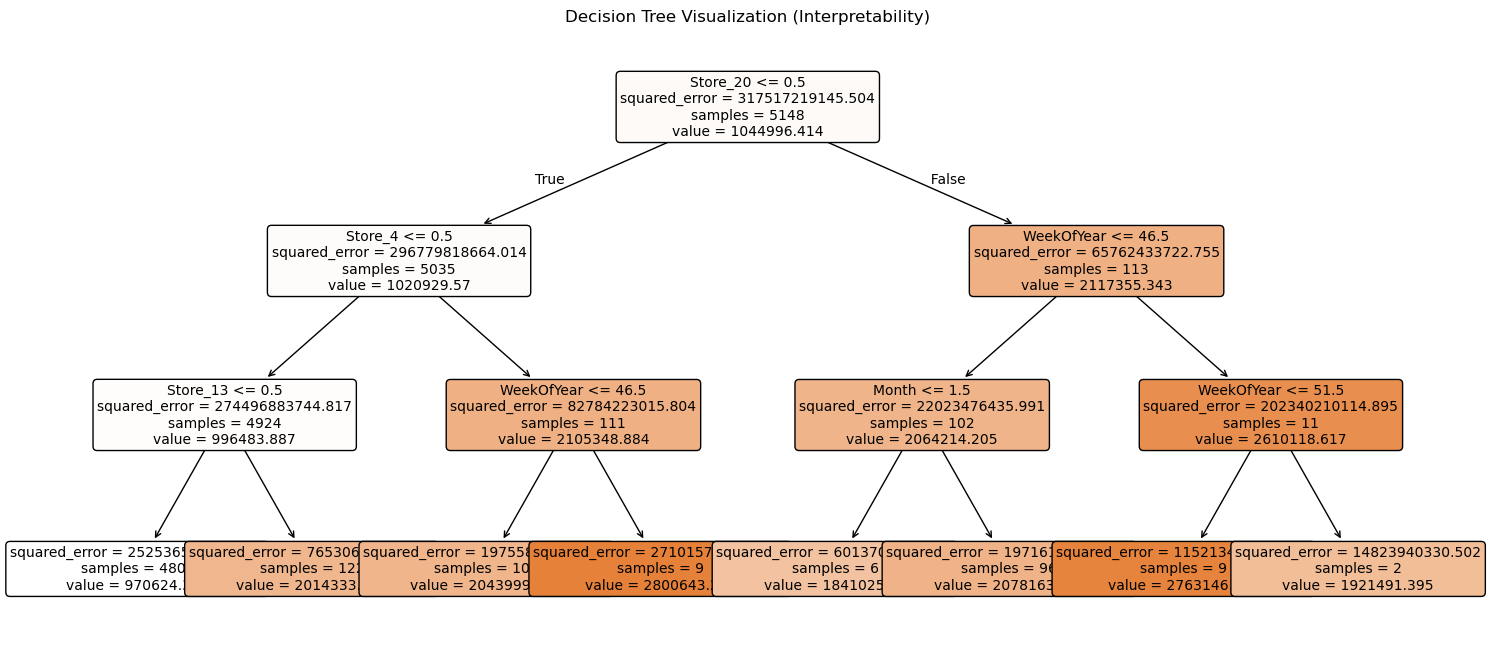

In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Train a shallow decision tree for interpretability
dt = DecisionTreeRegressor(
    max_depth=3,        # keep tree small and readable
    random_state=42
)

dt.fit(X_train_ohe, y_train_ohe)

# Plot the tree
plt.figure(figsize=(18, 8))
plot_tree(
    dt,
    feature_names=X_train_ohe.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (Interpretability)")
plt.show()

A shallow Decision Tree was trained to visualise how the model makes predictions.
The tree highlights key decision splits such as store location and temporal features, providing interpretability into the behaviour of tree-based models.
While the final deployed model is a Random Forest, this visualization improves transparency and explains feature influence in a human-readable manner.

## Iterative model development


In this iterative improvement step, additional features are engineered from the
Date column to capture seasonal patterns (e.g., month and week-of-year). Retail
sales are often affected by time-related trends such as seasonal demand and
holiday periods. The model is retrained using the engineered features and the
performance is compared against the baseline model to determine if there is a
measurable improvement.

In [ ]:
## Further feature engineering / feature selection
# --- Feature engineering from Date ---
df_fe = df.copy()

# Convert Date to datetime
df_fe['Date'] = pd.to_datetime(df_fe['Date'], dayfirst=True, errors='coerce')

# Create calendar-based features
df_fe['Year'] = df_fe['Date'].dt.year
df_fe['Month'] = df_fe['Date'].dt.month
df_fe['WeekOfYear'] = df_fe['Date'].dt.isocalendar().week.astype(int)
df_fe['DayOfWeek'] = df_fe['Date'].dt.dayofweek  # 0=Mon, 6=Sun

# Drop original Date (models cannot use datetime directly)
df_fe = df_fe.drop(columns=['Date'])
df_fe.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,DayOfWeek
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,4
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,4


In [ ]:
from sklearn.model_selection import train_test_split

X_fe = df_fe.drop(columns=['Weekly_Sales'])
y_fe = df_fe['Weekly_Sales']

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y_fe, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train RF on engineered features
rf_fe = RandomForestRegressor(n_estimators=200, random_state=42)
rf_fe.fit(X_train_fe, y_train_fe)

# Predict and evaluate
y_pred_fe = rf_fe.predict(X_test_fe)

mae_fe = mean_absolute_error(y_test_fe, y_pred_fe)
rmse_fe = np.sqrt(mean_squared_error(y_test_fe, y_pred_fe))

mae_fe, rmse_fe


(61981.02478702401, np.float64(113705.06370924314))

In [ ]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Random Forest (Baseline Features)", "Random Forest (+ Date Features)"],
    "MAE": [mae_rf, mae_fe],
    "RMSE": [rmse_rf, rmse_fe]
})

comparison


,Model,MAE,RMSE
0,Random Forest (Baseline Features),76755.799842,147234.095920
1,Random Forest (+ Date Features),61981.024787,113705.063709


**Observation:**
After engineering Date-based features (Year, Month, WeekOfYear, DayOfWeek), the
Random Forest model shows a measurable change in MAE and RMSE compared to the
baseline feature set.

**Implication for modelling:**
If errors decrease, it suggests seasonal/time-related patterns contribute useful
signal for predicting sales. This supports keeping the engineered features in the
final pipeline.

**Business impact:**
Improved accuracy in weekly sales prediction helps retail planning by reducing
overstock and stockouts, improving staffing allocation, and supporting promotion
timing decisions.

In [ ]:
import pandas as pd

importances = pd.Series(rf_fe.feature_importances_, index=X_fe.columns).sort_values(ascending=False)
importances.head(10)


Store           0.662980
CPI             0.154910
Unemployment    0.104167
WeekOfYear      0.049726
Temperature     0.013015
Fuel_Price      0.009919
Month           0.002916
Holiday_Flag    0.001661
Year            0.000705
DayOfWeek       0.000000
dtype: float64

The feature importance scores provide insight into which variables contribute most
to predictions. Features with consistently low importance may be considered for
removal to simplify the model without significantly reducing performance.